# Exploratory Data Analysis-Task 1(BCG-Virtual Data Scientist Internship)



## Task Overview:-

PowerCo - a major gas and electricity utility who is concerned about losing customers, use python to analyze client data,Create data visualizations to help you interpret key trends, conduct exploratory data analysis, investigate whether price sensitivity is the most influential factor for a customer churning or not, perform feature engineering to test hypotheses.Build a predictive model for churn using a random forest technique and write an executive summary with your findings

### Data Dictionary-The list of predictors/features available in this client_data.csv data set are described below:-
<ol>
<li>id = client company identifier</li>
<li>activity_new = category of the company’s activity</li>
<li>channel_sales = code of the sales channel</li>
<li>cons_12m = electricity consumption of the past 12 months</li>
<li>cons_gas_12m = gas consumption of the past 12 months</li>
<li>cons_last_month = electricity consumption of the last month</li>
<li>date_activ = date of activation of the contract</li>
<li>date_end = registered date of the end of the contract</li>
<li>date_modif_prod = date of the last modification of the product</li>
<li>date_renewal = date of the next contract renewal</li>
<li>forecast_cons_12m = forecasted electricity consumption for next 12 months</li>
<li>forecast_cons_year = forecasted electricity consumption for the next calendar year</li>
<li>forecast_discount_energy = forecasted value of current discount</li>
<li>forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months</li>
<li>forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)</li>
<li>forecast_price_energy_peak = forecasted energy price for 2nd period (peak)</li>
<li>forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)</li>
<li>has_gas = indicated if client is also a gas client</li>
<li>imp_cons = current paid consumption</li>
<li>margin_gross_pow_ele = gross margin on power subscription</li>
<li>margin_net_pow_ele = net margin on power subscription</li>
<li>nb_prod_act = number of active products and services</li>
<li>net_margin = total net margin</li>
<li>num_years_antig = antiquity of the client (in number of years)</li>
<li>origin_up = code of the electricity campaign the customer first subscribed to</li>
<li>pow_max = subscribed power</li>
<li>churn = has the client churned over the next 3 months</li>
</ol>

### The list of features available in this price_data.csv data ● id = client company identifier
<ol>
<li>price_date = reference date</li>
<li>price_off_peak_var = price of energy for the 1st period (off peak)</li>
<li>price_peak_var = price of energy for the 2nd period (peak)</li>
<li>price_mid_peak_var = price of energy for the 3rd period (mid peak)</li>
<li>price_off_peak_fix = price of power for the 1st period (off peak)</li>
<li>price_peak_fix = price of power for the 2nd period (peak)</li>
<li>price_mid_peak_fix = price of power for the 3rd period (mid peak)</li>
</ol>

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data 
We have loaded client_data.csv and price_data.csv into individual dataframes and we will first look at the data of each dataframe.

In [4]:
df_client=pd.read_csv('client_data.csv')
df_client.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
df_price=pd.read_csv('price_data.csv')
df_price.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive Statistics

In [5]:
df_client.info() # To get an overview of the data types within a data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

The data contains 26 columns and 14606 rows, with mostly numeric features (int64,float64),The datatype of date_activ, date_end, date_modif_prod and date_renewal is object, so we need to convert them to datetime.

In [5]:
date=["date_activ", "date_end", "date_modif_prod", "date_renewal"]
for i in date:
    df_client[i] = pd.to_datetime(df_client[i])

In [7]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [8]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [9]:
df_price["price_date"] = pd.to_datetime(df_price["price_date"])

Now let's look at some statistics about the datasets. 

In [10]:
df_client.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


The summary statistics of the df_client shows the mean, sd, min, and max values for each of the columns.

In [11]:
df_price.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [12]:
df_client.shape

(14606, 26)

In [13]:
df_price.shape

(193002, 8)

### Missing data

In [14]:
#To Check the missing value in each column 
pd.DataFrame({"Missing value (%)": df_client.isnull().sum()/len(df_client.index)*100})

,Missing value (%)
id,0.0
channel_sales,0.0
cons_12m,0.0
cons_gas_12m,0.0
cons_last_month,0.0
date_activ,0.0
date_end,0.0
date_modif_prod,0.0
date_renewal,0.0
forecast_cons_12m,0.0


In [15]:
pd.DataFrame({"Missing value (%)": df_price.isnull().sum()/len(df_price.index)*100})

,Missing value (%)
id,0.0
price_date,0.0
price_off_peak_var,0.0
price_peak_var,0.0
price_mid_peak_var,0.0
price_off_peak_fix,0.0
price_peak_fix,0.0
price_mid_peak_fix,0.0


Well, both dataset has zero null values that made our task bit easy.

### Data Visualization

In [16]:
#Churn Percentage
churn_df=df_client[['id','churn']] 
churn_df.columns=['Companies','churn']
churn_df_total=churn_df.groupby(churn_df['churn']).count()
churn_df_percentage=churn_df_total/churn_df_total.sum()*100

In [17]:
churn_df_percentage

,Companies
churn,
0,90.284814
1,9.715186


<AxesSubplot:ylabel='churn'>

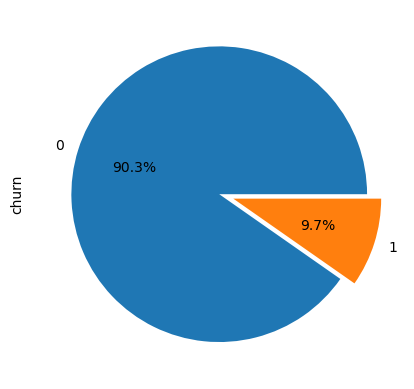

In [18]:
churn_df.churn.value_counts().plot(
    kind='pie',explode=(0,0.1),
    autopct='%1.1f%%')

About 10% of total customers have churned

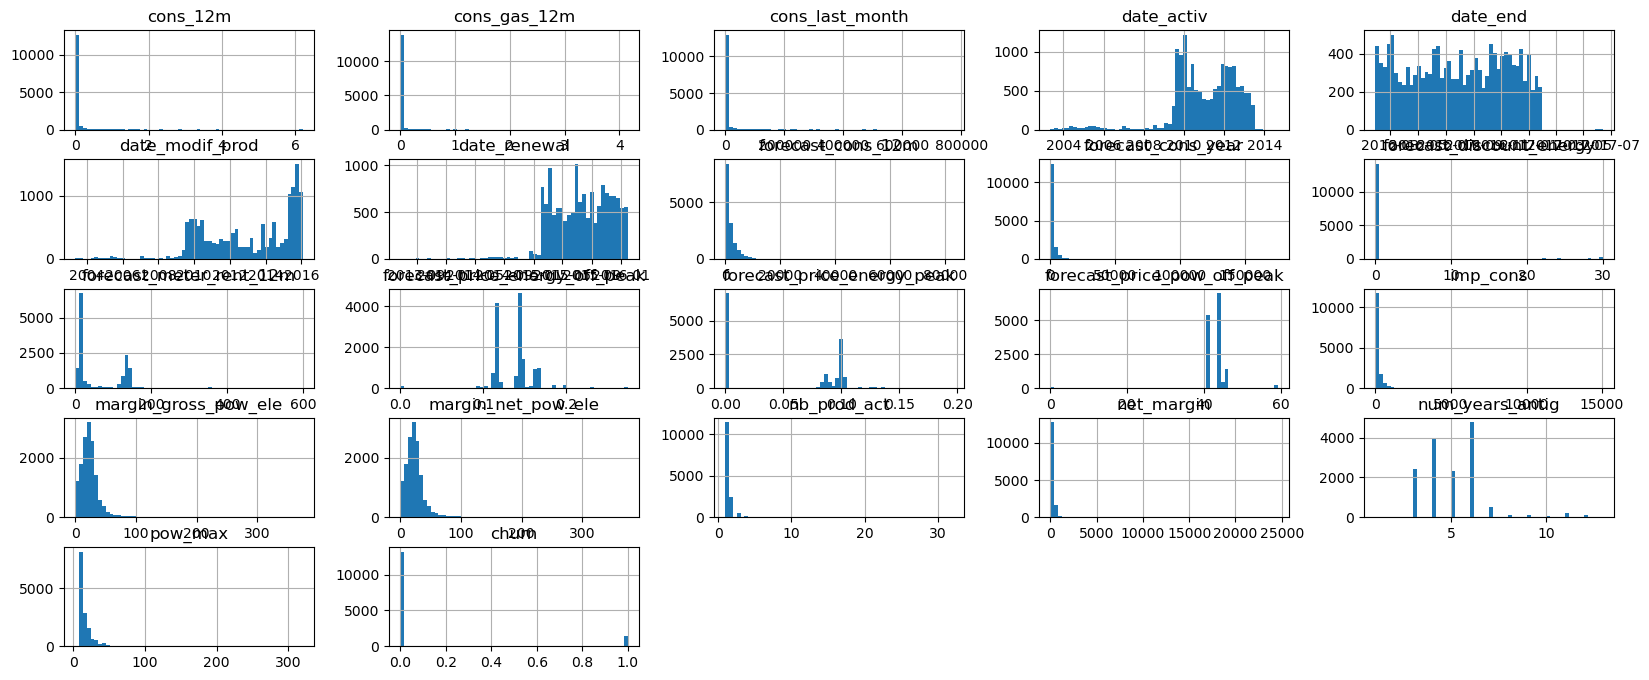

In [19]:
df_client.hist(bins=60, figsize=(20,8)) # The histograms below shows all variables distribution
plt.show()

The histograms above shows that data is positively skewed with outliers,we'll address skewness and outliers in the feature engineering.

In [20]:
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):   #Edited- added after checking 
    

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

In [21]:
#Sale channels can play an important role in customer's rentation or churn.Some strong sale channels can create quality and loyal customers.
channel=df_client[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn=(channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)


Text(0, 0.5, 'Company base(%)')

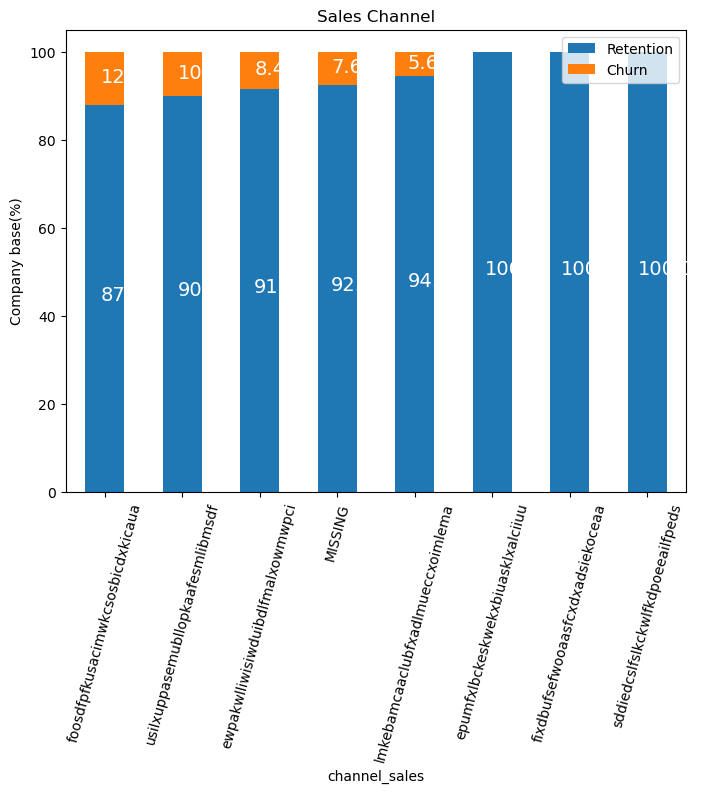

In [22]:
ax=channel_churn.plot(kind='bar',stacked=True,figsize=(8,6),rot=75)
annotate_stacked_bars(ax, textsize=14)
plt.title('Sales Channel')
plt.legend(['Retention','Churn'],loc='upper right')
plt.ylabel('Company base(%)')

Now, we will see the consumption of customers during the last month and 12 months againt the churn.

In [23]:
def plot_distribution(dataframe, column, ax, bins_=50):         #Edited, earlier was doing separately for each variable therefore defined function  
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

In [7]:
temp = pd.DataFrame({"Retention": df_client[df_client["churn"]==0]['cons_12m'],
    "Churn":df_client[df_client["churn"]==1]['cons_12m']})
temp

,Retention,Churn
0,NaN,0.0
1,4660.0,NaN
2,544.0,NaN
3,1584.0,NaN
4,4425.0,NaN
...,...,...
14601,32270.0,NaN
14602,NaN,7223.0
14603,NaN,1844.0
14604,131.0,NaN


In [24]:
consumption = df_client[["cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons", "has_gas", "churn"]]

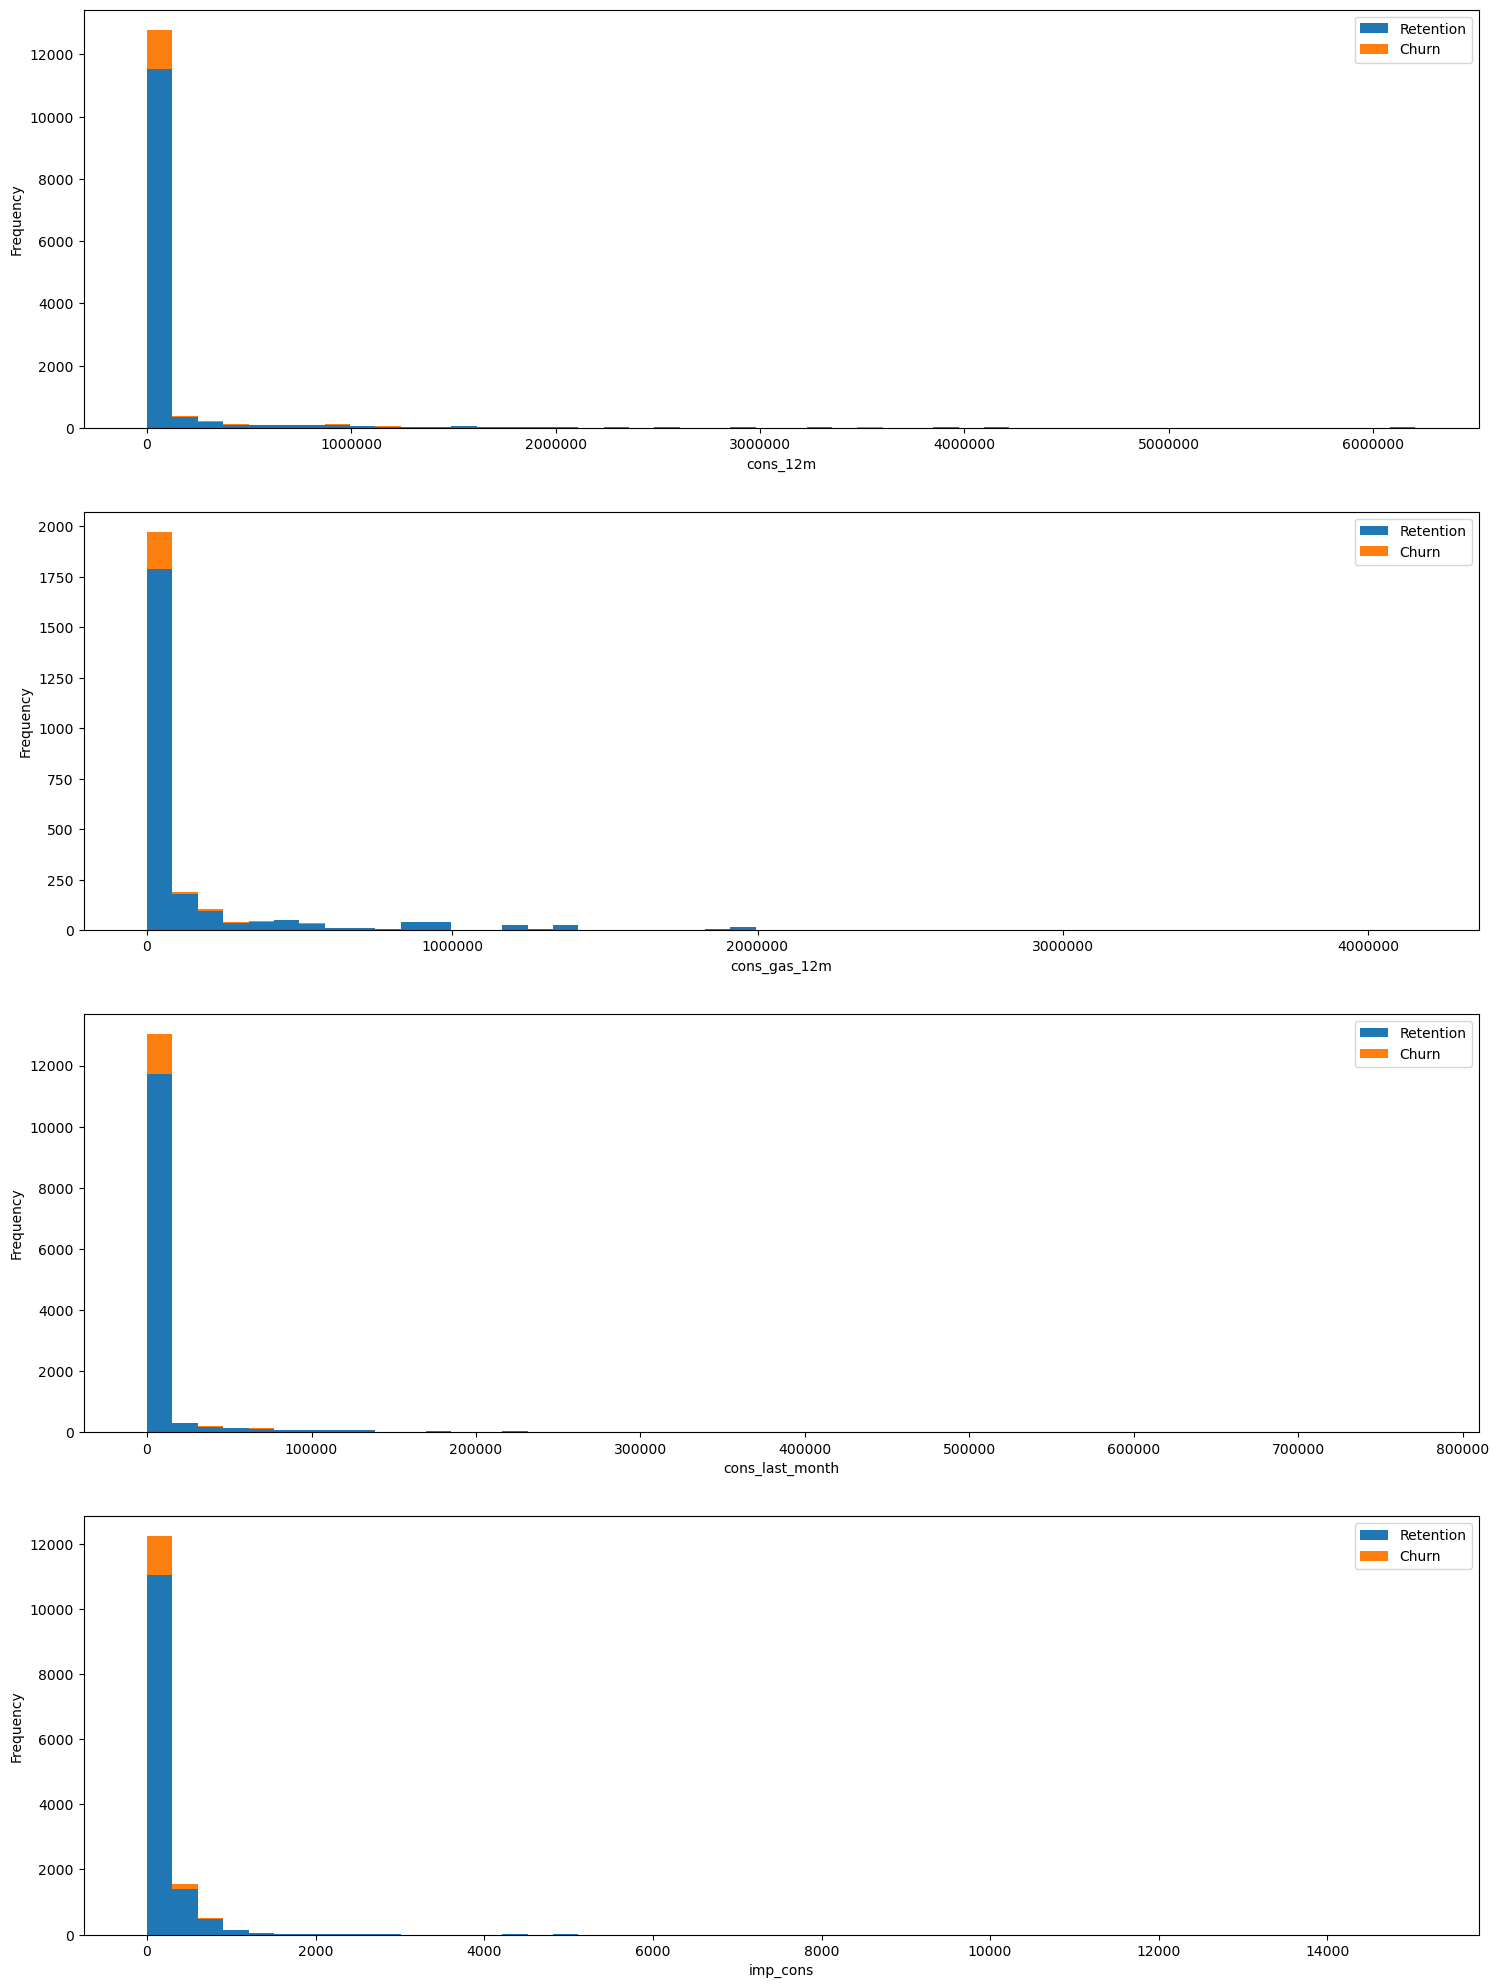

In [25]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

There are a lot of outliers at the upper in the dataset and it is highly positive skewed.

In [26]:
#Forecast
forecast = df_client[["forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak"]]

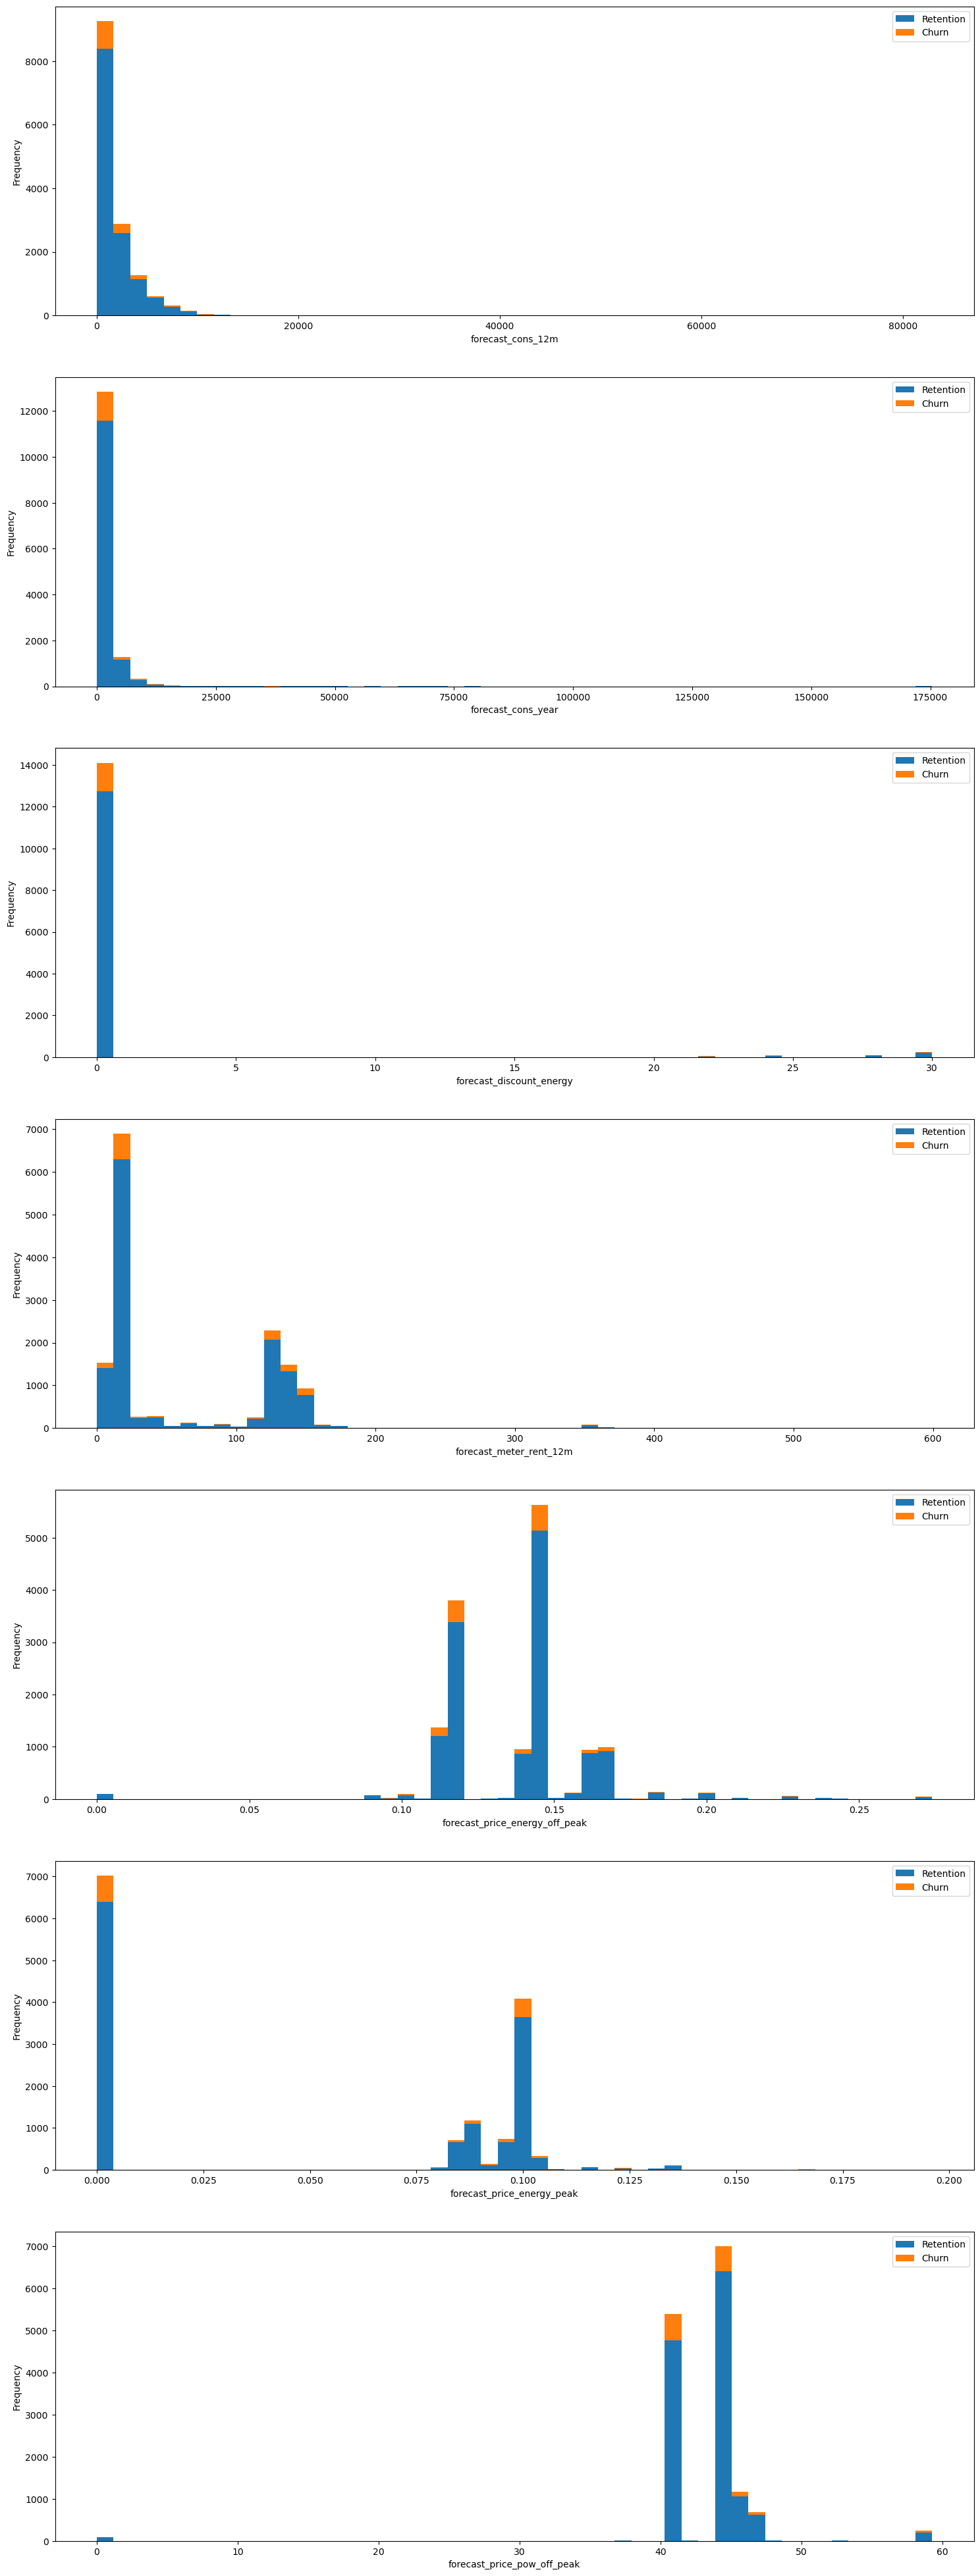

In [27]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(df_client, "forecast_cons_12m", axs[0])
plot_distribution(df_client, "forecast_cons_year", axs[1])
plot_distribution(df_client, "forecast_discount_energy", axs[2])
plot_distribution(df_client, "forecast_meter_rent_12m", axs[3])
plot_distribution(df_client, "forecast_price_energy_off_peak", axs[4])
plot_distribution(df_client, "forecast_price_energy_peak", axs[5])
plot_distribution(df_client, "forecast_price_pow_off_peak", axs[6])

In [28]:
#Contract type
contract_type = df_client[["id","has_gas","churn"]]
contract = contract_type.groupby([contract_type["churn"], contract_type["has_gas"]])["id"].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

Text(0.5, 1.0, 'Contract Type')

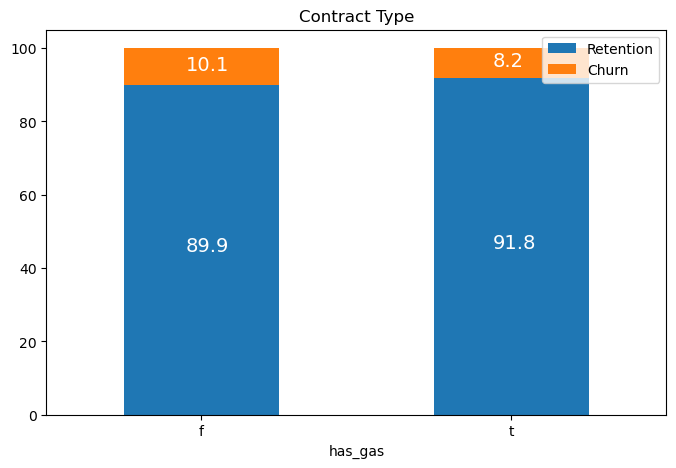

In [29]:
ax=contract_percentage.plot(kind='bar',stacked=True,figsize=(8,5),rot=0)
annotate_stacked_bars(ax, textsize=14)
plt.legend(['Retention','Churn'],loc="upper right")
plt.title("Contract Type")

In [30]:
#Subscribed power
power = df_client[["id", "pow_max", "churn"]]

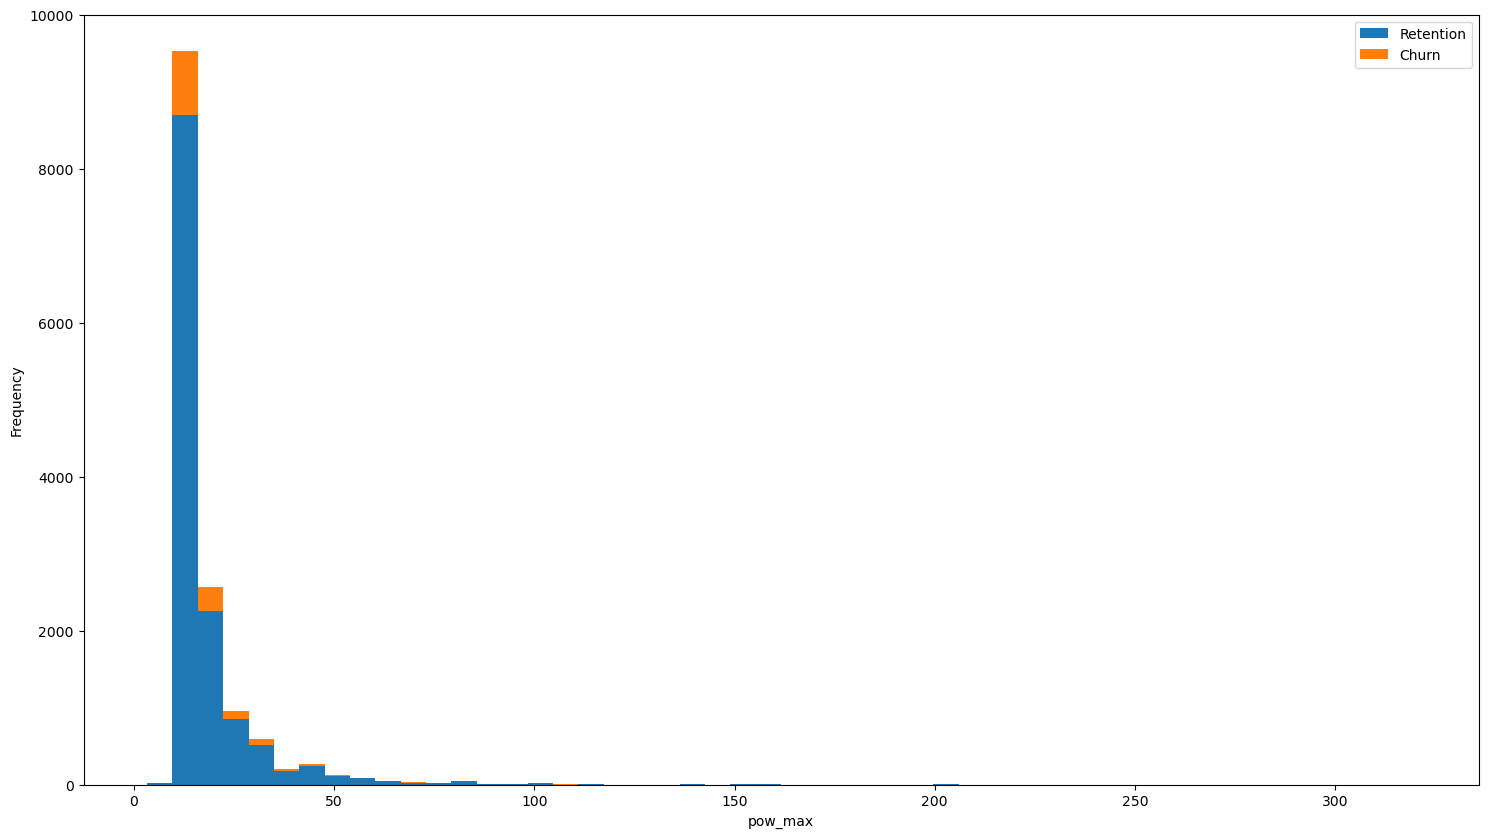

In [31]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)

In [ ]:
df_client['totaldays']=df_client['date_end']-df_client['date_activ']
df_client['totaldays']
df_client.totaldays.describe()

In [1]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df_client.corr(),annot=True)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
def year(column):
    df_client[column+'_year']=df_client[column].dt.year

year('date_activ')
year('date_end')
year('date_modif_prod')
year('date_renewal')

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
ax.hist(df_client['date_activ_year'],
    bins=20,color='blue')
ax.hist(df_client['date_end_year'],
    bins=3,color='black')
ax.hist(df_client['date_modif_prod_year'],
    bins=30,color='red')
ax.hist(df_client['date_renewal_year'],
    bins=8,color='green')
plt.show()

In [ ]:
df_client.has_gas.value_counts().plot(
    kind='pie',explode=(0,0.1),
    autopct='%1.1f%%')

In [32]:
#Price Dataset data visualization
df_price['id'].value_counts().value_counts()


12    15990
11       83
10       11
9         6
8         3
7         3
Name: id, dtype: int64

Most customers have a 12-month price records each

## Hypothesis Testing
The hypothesis is that churn may be affected by price, means if the price is a trigger for churn then the difference in price values(max-min) will be higher for churned customers compared to non-churned customers.When the price increases and some cutomers leave, then we can say these customers are sensitive to price as the increase in prices lead the customer churn. In case there is a decrease or no change in the price and cutomers still switch, it is hard to say these cutomers are sensitive to price.

In [33]:
churn_data=df_client[['id','churn']]

In [34]:
price_df=pd.merge(df_price,churn_data)
price_df.head(5)
price_df.shape

(175149, 9)

In [35]:
price_df[price_df['churn']==1].describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
count,17003.000000,17003.000000,17003.000000,17003.000000,17003.000000,17003.000000,17003.0
mean,0.141898,0.056554,0.033343,43.163536,11.192617,7.156747,1.0
std,0.022393,0.050830,0.037065,3.339677,12.505705,8.001130,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000,1.0
50%,0.145101,0.086905,0.000000,44.266930,0.000000,0.000000,1.0
75%,0.151367,0.103395,0.073487,44.266931,24.339581,16.226389,1.0
max,0.280700,0.169597,0.101037,59.444710,36.490689,16.958222,1.0


In [36]:
price_df[price_df['churn']==0].describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
count,158146.000000,158146.000000,158146.000000,158146.000000,158146.000000,158146.000000,158146.0
mean,0.142377,0.051575,0.027725,42.903794,9.272559,5.982435,0.0
std,0.023439,0.050203,0.035914,4.736986,12.077703,7.794217,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.126907,0.000000,0.000000,40.728885,0.000000,0.000000,0.0
50%,0.146845,0.084213,0.000000,44.266930,0.000000,0.000000,0.0
75%,0.151635,0.101781,0.072775,44.444710,24.339581,16.226389,0.0
max,0.280700,0.229788,0.114102,59.444710,36.490689,17.458221,0.0


In [37]:
not_churned=price_df[price_df['churn']==0]
churned=price_df[price_df['churn']==1]
not_churned

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,0
...,...,...,...,...,...,...,...,...,...
175144,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,0
175145,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,0
175146,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,0
175147,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,0


we will define the price sensitivity for different price variables as (price_off_peak_var, price_peak_var, price_mid_peak_var, price_off_peak_fix, price_peak_fix, price_mid_peak_fix)for customers who have churned (stored in “churned” dataframe)the difference between the maximum and minimum price value for each customer (identified by unique “id” value) and appending the result to a list (churn_price_off, churn_price_peak_var, churn_mid, churn_poff_fix, churn_p_fix, churn_p_mid respectively).The code is iterating over all unique customer IDs in the “churned” dataframe and repeating the process for each price variable.


In [38]:
churn_price_off=[] 
for Id in churned['id'].unique():
    max_value=churned[churned['id']==Id]['price_off_peak_var'].max()
    min_value=churned[churned['id']==Id]['price_off_peak_var'].min()
    price_off_sensitity=max_value-min_value
    churn_price_off.append(price_off_sensitity)

churn_price_peak_var=[]
for Id in churned['id'].unique():
    max_value=churned[churned['id']==Id]['price_peak_var'].max()
    min_value=churned[churned['id']==Id]['price_peak_var'].min()
    price_off_sensitity=max_value-min_value
    churn_price_peak_var.append(price_off_sensitity)
    
churn_mid=[]
for Id in churned['id'].unique():
    max_value=churned[churned['id']==Id]['price_mid_peak_var'].max()
    min_value=churned[churned['id']==Id]['price_mid_peak_var'].min()
    price_off_sensitity=max_value-min_value
    churn_mid.append(price_off_sensitity)
    
    
#fix
churn_poff_fix=[]
for Id in churned['id'].unique():
    max_value=churned[churned['id']==Id]['price_off_peak_fix'].max()
    min_value=churned[churned['id']==Id]['price_off_peak_fix'].min()
    price_off_sensitity=max_value-min_value
    churn_poff_fix.append(price_off_sensitity)

churn_p_fix=[]
for Id in churned['id'].unique():
    max_value=churned[churned['id']==Id]['price_peak_fix'].max()
    min_value=churned[churned['id']==Id]['price_peak_fix'].min()
    price_off_sensitity=max_value-min_value
    churn_p_fix.append(price_off_sensitity)
    
churn_p_mid=[]
for Id in churned['id'].unique():
    max_value=churned[churned['id']==Id]['price_mid_peak_fix'].max()
    min_value=churned[churned['id']==Id]['price_mid_peak_fix'].min()
    price_off_sensitity=max_value-min_value
    churn_p_mid.append(price_off_sensitity)

In [ ]:
not_churn_price_off=[] 
for Id in not_churned['id'].unique():
    max_value=not_churned[not_churned['id']==Id]['price_off_peak_var'].max()
    min_value=not_churned[not_churned['id']==Id]['price_off_peak_var'].min()
    price_off_sensitity=max_value-min_value
    not_churn_price_off.append(price_off_sensitity)

not_churn_price_peak_var=[]
for Id in not_churned['id'].unique():
    max_value=not_churned[not_churned['id']==Id]['price_peak_var'].max()
    min_value=not_churned[not_churned['id']==Id]['price_peak_var'].min()
    price_off_sensitity=max_value-min_value
    not_churn_price_peak_var.append(price_off_sensitity)
    
not_churn_mid=[]
for Id in not_churned['id'].unique():
    max_value=not_churned[not_churned['id']==Id]['price_mid_peak_var'].max()
    min_value=not_churned[not_churned['id']==Id]['price_mid_peak_var'].min()
    price_off_sensitity=max_value-min_value
    not_churn_mid.append(price_off_sensitity)
    
    
#fix
not_churn_poff_fix=[]
for Id in not_churned['id'].unique():
    max_value=not_churned[not_churned['id']==Id]['price_off_peak_fix'].max()
    min_value=not_churned[not_churned['id']==Id]['price_off_peak_fix'].min()
    price_off_sensitity=max_value-min_value
    not_churn_poff_fix.append(price_off_sensitity)

not_churn_p_fix=[]
for Id in not_churned['id'].unique():
    max_value=not_churned[not_churned['id']==Id]['price_peak_fix'].max()
    min_value=not_churned[not_churned['id']==Id]['price_peak_fix'].min()
    price_off_sensitity=max_value-min_value
    not_churn_p_fix.append(price_off_sensitity)
    
not_churn_p_mid=[]
for Id in not_churned['id'].unique():
    max_value=not_churned[not_churned['id']==Id]['price_mid_peak_fix'].max()
    min_value=not_churned[not_churned['id']==Id]['price_mid_peak_fix'].min()
    price_off_sensitity=max_value-min_value
    not_churn_p_mid.append(price_off_sensitity)

In [ ]:
not_churned_price = pd.DataFrame(
    {
     
     'price_off_peak_var': not_churn_price_off,
     'price_peak_var': not_churn_price_peak_var,
     'price_mid_peak_var': not_churn_mid,
     'price_off_peak_fix': not_churn_poff_fix,
     'price_peak_fix': not_churn_p_fix,
     'price_mid_peak_fix': not_churn_p_mid
    })

In [ ]:
not_churned_price

In [ ]:
churned_price = pd.DataFrame({'price_off_peak_var': churn_price_off,
     'price_peak_var': churn_price_off,
     'price_mid_peak_var': churn_mid,
     'price_off_peak_fix': churn_poff_fix,
     'price_peak_fix': churn_p_fix,
     'price_mid_peak_fix': churn_p_mid})


In [ ]:
X_= ['price_off_peak_fix','price_peak_fix','price_mid_peak_fix']
notchurn=not_churned_price.mean()
churn=churned_price.mean()
X_axis = np.arange(len(X_))
plt.bar(
    X_axis - 0.2, notchurn[3:6],
    0.4, label = 'notchurn')
plt.bar(
    X_axis + 0.2, churn[3:6],
    0.4, label = 'churn')
plt.xticks(X_axis, X_)
plt.legend()
plt.show()


In [ ]:
X_= ['price_off_peak_var','price_peak_var','price_mid_peak_var']
notchurn=not_churned_price.mean()
churn=churned_price.mean()
X_axis = np.arange(len(X_))
plt.bar(
    X_axis - 0.2, notchurn[0:3],
    0.4, label = 'notchurn')
plt.bar(
    X_axis + 0.2, churn[0:3],
    0.4, label = 'churn')
plt.xticks(X_axis, X_)
plt.legend()
plt.show()
